In [1]:
import os
import sys
from pathlib import Path
import torch
import torchvision
import numpy as np
from pycocotools.coco import COCO
from PIL import Image

In [2]:
parent_dir = os.getcwd()
new_dir = "dataset/targets"
try:
    os.mkdir(os.path.join(parent_dir, new_dir))
except FileExistsError:
    pass

In [3]:
SEG_LABELS_LIST = [
    {"id": 0, "name": "void",       "rgb_values": [0,   0,    0]},
    {"id": 1,  "name": "non-skin",   "rgb_values": [0,  0,    128]},
    {"id": 2,  "name": "skin",      "rgb_values": [0,   128,  0]},
    {"id": 3,  "name": "acne",      "rgb_values": [128,   0,  0]},
]

def label_img_to_rgb(label_img):
    label_img = np.squeeze(label_img)
    labels = np.unique(label_img)
    label_infos = [l for l in SEG_LABELS_LIST if l['id'] in labels]

    label_img_rgb = np.array([label_img,
                              label_img,
                              label_img]).transpose(1,2,0)
    for l in label_infos:
        mask = label_img == l['id']
        label_img_rgb[mask] = l['rgb_values']

    return label_img_rgb.astype(np.uint8)



In [4]:
#transform definition
img_to_tensor = torchvision.transforms.ToTensor()

def generate_target(img_id:int):
    img = Image.open("dataset/images/{0}.png".format(img_id))
    inputs = img_to_tensor(img).unsqueeze(0)  # *255 to get back true unnormalized rgb values
    
    targets = -torch.ones(1, 1, inputs.size()[2], inputs.size()[3])
    coco = COCO("dataset/labels/{0}.json".format(img_id))
    cat_ids = coco.getCatIds()
    img_ids = coco.getImgIds()
    anns_ids = coco.getAnnIds(imgIds=img_ids, catIds=cat_ids, iscrowd=None)
    anns = coco.loadAnns(anns_ids)
    mask = coco.annToMask(anns[0])
    for i in range(1,len(anns)):
        mask += coco.annToMask(anns[i])*anns[i]['category_id']
        
    target_img = Image.fromarray(label_img_to_rgb(mask))
    
    return target_img

In [7]:
image_paths_file = 'dataset/reddit.txt'
root_dir_name = os.path.dirname(image_paths_file)

with open(image_paths_file) as f:
    image_names = f.read().splitlines()

for img_name in image_names:
    img_id = img_name.replace('.png', '')
    try:
        target = Image.open(os.path.join(root_dir_name, 'targets', img_id + '_t.png'))
    except FileNotFoundError:
        target_img = generate_target(img_id)
        target_img.save("dataset/targets/{0}_t.png".format(img_id))

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
load

In [6]:
img_array = np.array(img)
img_array[mask != 0] = 0

NameError: name 'img' is not defined

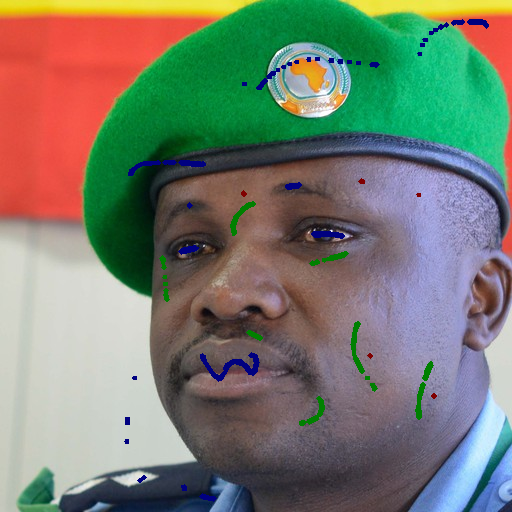

In [71]:
Image.fromarray(img_array + label_img_to_rgb(mask))